## Programming exercises

### Visualizing Fisher's Iris data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("iris.csv")
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


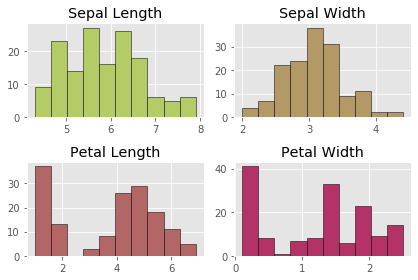

In [3]:
plt.style.use('ggplot')
colNames=df.columns[0:-1].tolist()
for colName in colNames:
    plt.subplot(2,2,colNames.index(colName)+1)
    plt.hist(df[colName],color=(0.7, 0.8-colNames.index(colName)*0.2, 0.4),edgecolor='black')
    plt.title(colName)
    plt.tight_layout()

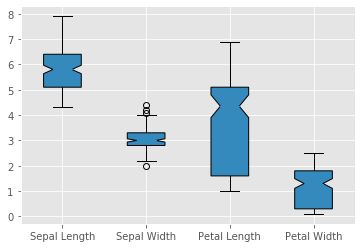

In [4]:
box=[]
for colName in colNames:
    box.append(df[colName].tolist())
plt.boxplot(box,notch='True',patch_artist=True,labels=colNames) ;  


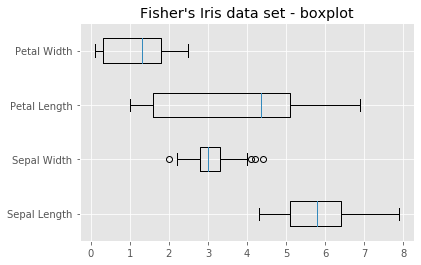

In [5]:
box=[]
for colName in colNames:
    box.append(df[colName].tolist())

plt.boxplot(box,vert=0,labels=colNames)
plt.title('Fisher\'s Iris data set - boxplot'); 
 

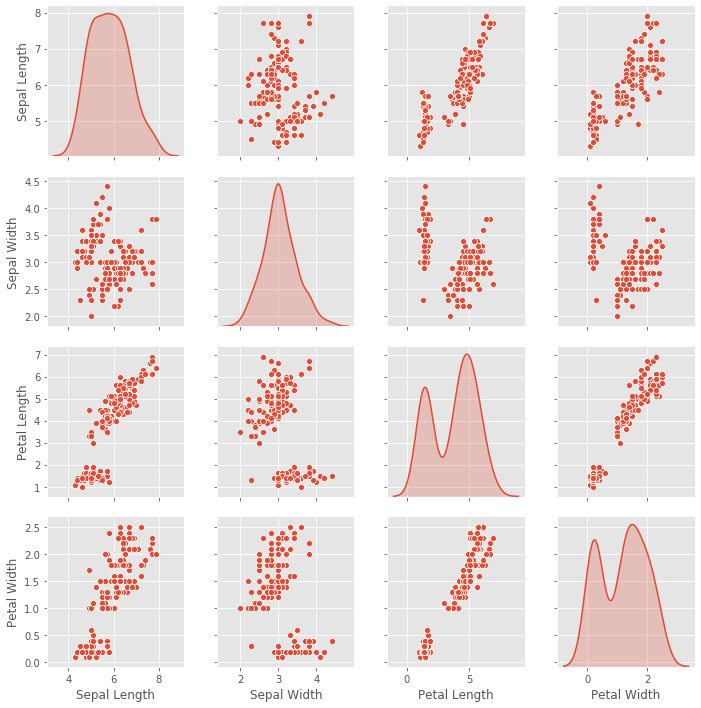

In [6]:
import seaborn as sns

data=df.iloc[:,[0,1,2,3]]
sns.pairplot(data, kind="scatter",diag_kind="kde");

In [7]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


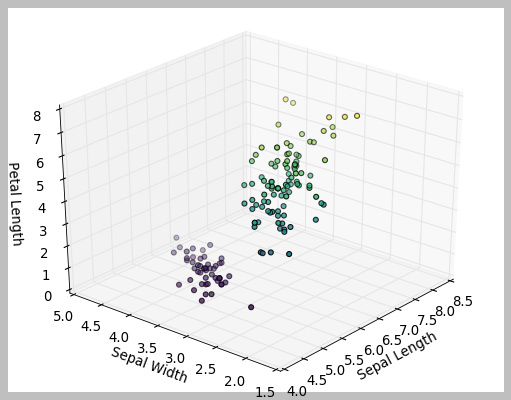

In [8]:
# 3D
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('_classic_test')
colNames=df.columns[0:-1].tolist()
fig=plt.figure()
ax=fig.add_subplot(111,projection="3d")
ax.scatter(xs=df[colNames[0]], ys=df[colNames[1]],zs=df[colNames[2]],
           c=df[colNames[2]], cmap='viridis')
ax.set_xlabel(colNames[0])
ax.set_ylabel(colNames[1])
ax.set_zlabel(colNames[2])
ax.view_init(30, 220)
plt.show()

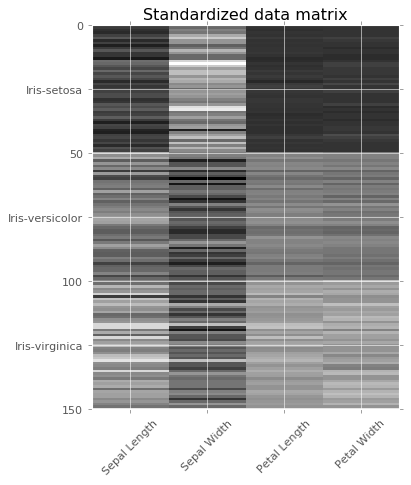

In [9]:
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')
scaler=StandardScaler()
data=df.iloc[:,[0,1,2,3]]
colName= data.columns
dat_scaled = scaler.fit_transform(data)
dat_scaled.shape

fig, ax = plt.subplots(1,1)
img = ax.imshow(dat_scaled,aspect=1/30,interpolation='Nearest',cmap="gray")
plt.title('Standardized data matrix')


x_label_list = colName.tolist()
y_label_list = df.Type.unique().tolist()

ax.set_xticks([0,1,2,3])
ax.set_yticks([0,25,50,75,100,125,150])

ax.set_xticklabels(x_label_list, rotation=45)
ax.set_yticklabels([0,"Iris-setosa",50,'Iris-versicolor',100,'Iris-virginica',150]);


### Visualizing Wine Data

In [11]:
import scipy
mat_data=scipy.io.loadmat("wine.mat")

In [12]:
mat_data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'attributeNames', 'y', 'classNames', 'N', 'M', 'C'])

In [13]:
X = np.matrix(mat_data['X'])
y = np.matrix(mat_data['y'])
C = mat_data['C'][0,0]
M = mat_data['M'][0,0]
N = mat_data['N'][0,0]
attributeNames = [name[0][0] for name in mat_data['attributeNames']]
classNames = [cls[0][0] for cls in mat_data['classNames']]

In [14]:
print(X.shape)
print(y.shape)
print(attributeNames)
print(classNames)

(6497, 12)
(6497, 1)
['Fixed acidity', 'Volatile acidity', 'Citric acid', 'Residual sugar', 'Chlorides', 'Free sulfur dioxide', 'Total sulfur dioxide', 'Density', 'pH', 'Sulphates', 'Alcohol', 'Quality score (0--10)']
['Red']


In [15]:
col=np.concatenate((X,y),axis=1)
print(col.shape)
attributeNames.append("y")

(6497, 13)


In [16]:
df=pd.DataFrame(col).set_axis(attributeNames, axis=1, inplace=False)
df.head()

,Fixed acidity,Volatile acidity,Citric acid,Residual sugar,Chlorides,Free sulfur dioxide,Total sulfur dioxide,Density,pH,Sulphates,Alcohol,Quality score (0--10),y
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0,0.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,0.0


We start with a box plot of each attribute

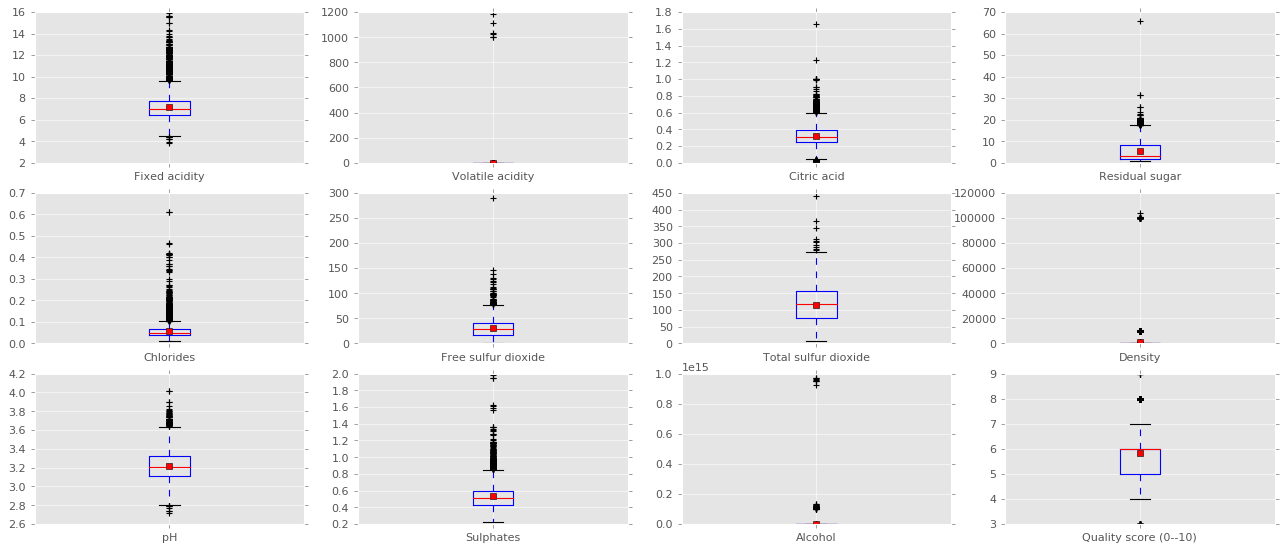

In [17]:
from scipy.stats import zscore
colNames=df.columns[0:-1].tolist()
plt.figure(figsize=(20,8))
for colName in colNames:
    plt.subplot(3,4,colNames.index(colName)+1)
    plt.boxplot(df[colName],showmeans=True)
    #plt.tight_layout()
    plt.xticks([1],[colName])    

From this it is clear that there are some outliers in the Alcohol attribute (10x10^14 is clearly not a proper value for alcohol content). However, it is impossible to see the distribution of the data, because the axis is dominated by these extreme outliers. To avoid this, we plot a box plot of standardized data (using the zscore function).

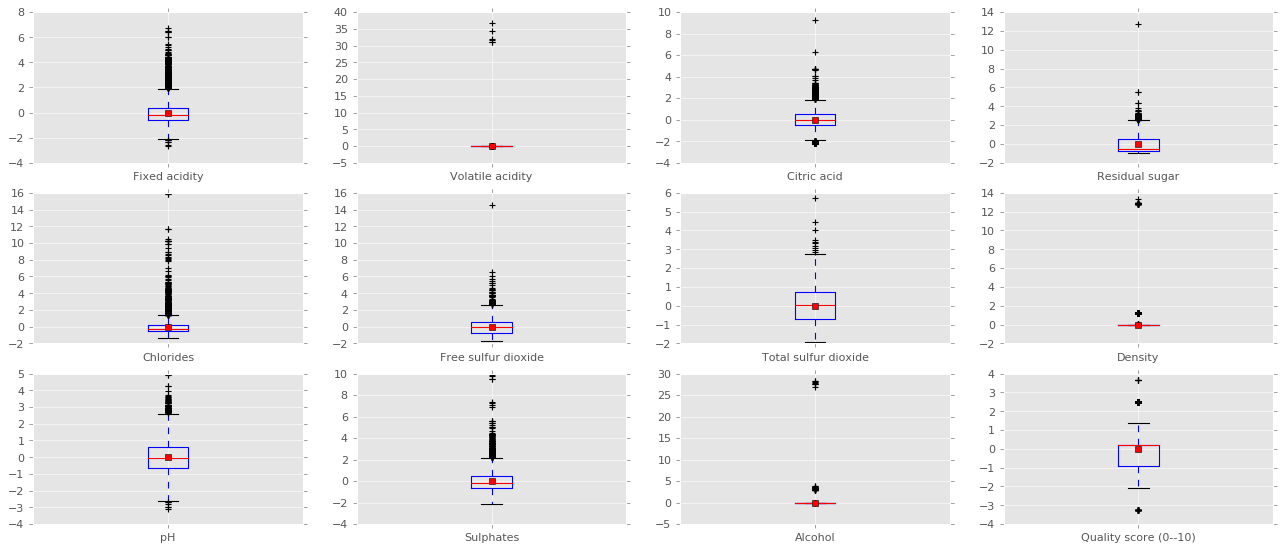

In [18]:
plt.figure(figsize=(20,8))
for colName in colNames:
    plt.subplot(3,4,colNames.index(colName)+1)
    plt.boxplot(zscore(df[colName],ddof=1),showmeans=True)
    #plt.tight_layout()
    plt.xticks([1],[colName])   

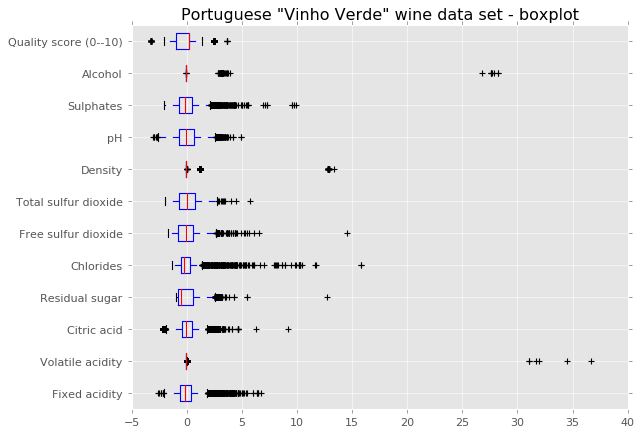

In [19]:
box=[]
for colName in colNames:
    box.append(zscore(df[colName],ddof=1).tolist())

plt.boxplot(box,vert=0,labels=colNames)
plt.title('Portuguese "Vinho Verde" wine data set - boxplot'); 

This plot reveals that there are clearly some outliers in the Volatile acidity, Density, and Alcohol attributes, i.e. attribute number 2, 8, and 11. 

Next, we plot histograms of all attributes.

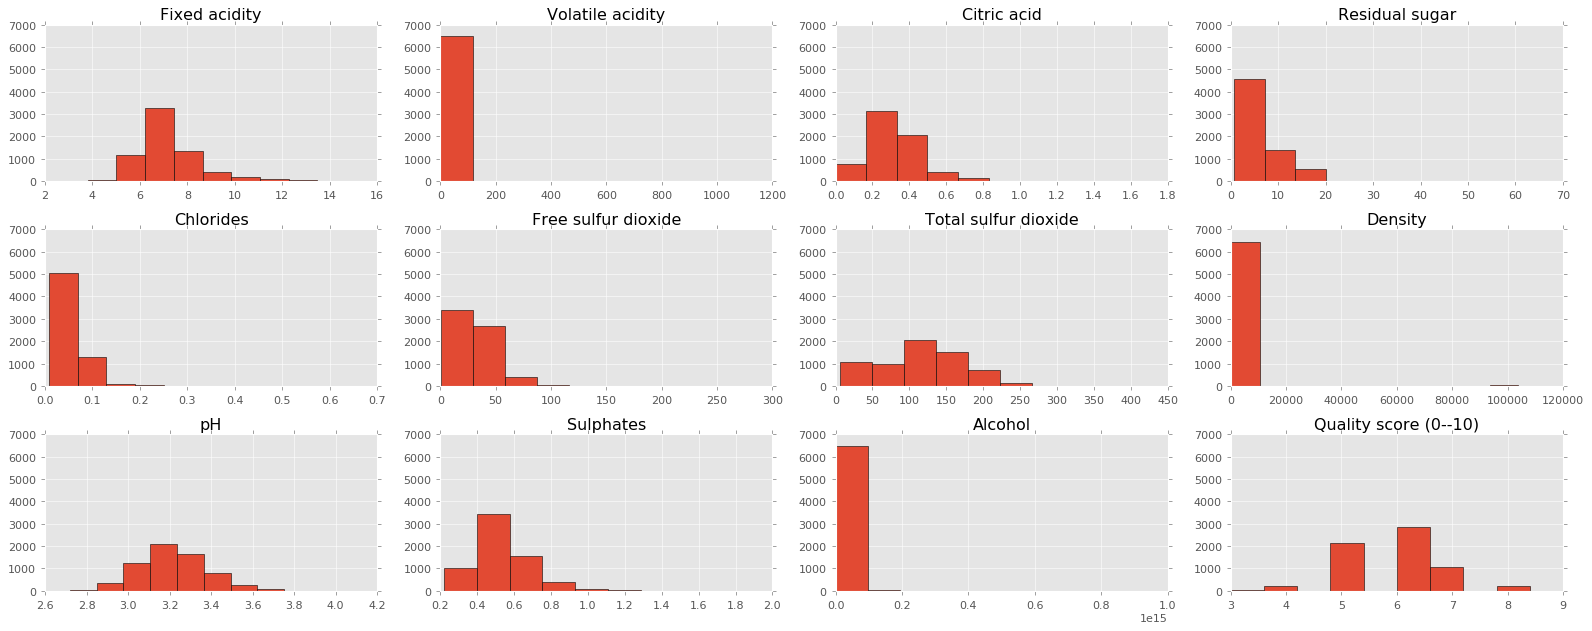

In [20]:
plt.figure(figsize=(20,8))
for colName in colNames:
    plt.subplot(3,4,colNames.index(colName)+1)
    plt.hist(df[colName],edgecolor='black')
    plt.title(colName)
    plt.ylim(0, 7000)#  Make the y-axes equal for improved readability
    plt.tight_layout()
    

The histograms show that there are a few very extreme values in these three attributes. To identify these values as outliers, we must use our knowledge about the data set and the attributes. Say we expect volatide acidity to be around 0-2 g/dm^3, density to be close to 1 g/cm^3, and alcohol percentage to be somewhere between 5-20 % vol. Then we can safely identify the following outliers, which are a factor of 10 greater than the largest we expect.

In [21]:
colNames

['Fixed acidity',
 'Volatile acidity',
 'Citric acid',
 'Residual sugar',
 'Chlorides',
 'Free sulfur dioxide',
 'Total sulfur dioxide',
 'Density',
 'pH',
 'Sulphates',
 'Alcohol',
 'Quality score (0--10)']

In [22]:
print(len(df))
print(len(df[(df['Volatile acidity']>20)]))
print(len(df[(df['Density']>10)]))
print(len(df[(df['Alcohol']>200)]))
print(len(df[(df['Volatile acidity']>20) | (df['Density']>10) | (df["Alcohol"]>200)]))


6497
6
147
40
193


In [23]:
print(len(df))
print(len(df[(df['Volatile acidity']<20)]))
print(len(df[(df['Density']<10)]))
print(len(df[(df['Alcohol']<200)]))
print(len(df[(df['Volatile acidity']<20) & (df['Density']<10) & (df["Alcohol"]<200)]))

6497
6491
6350
6457
6304


In [24]:
df_outlier=df[(df['Volatile acidity']>20) | (df['Density']>10) | (df["Alcohol"]>200)]
newdf=df.merge(df_outlier, how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='left_only']
print(len(newdf))

6304


Now, we can repeat the process to see if there are any more outliers present in the data. We take a look at a histogram of all attributes:

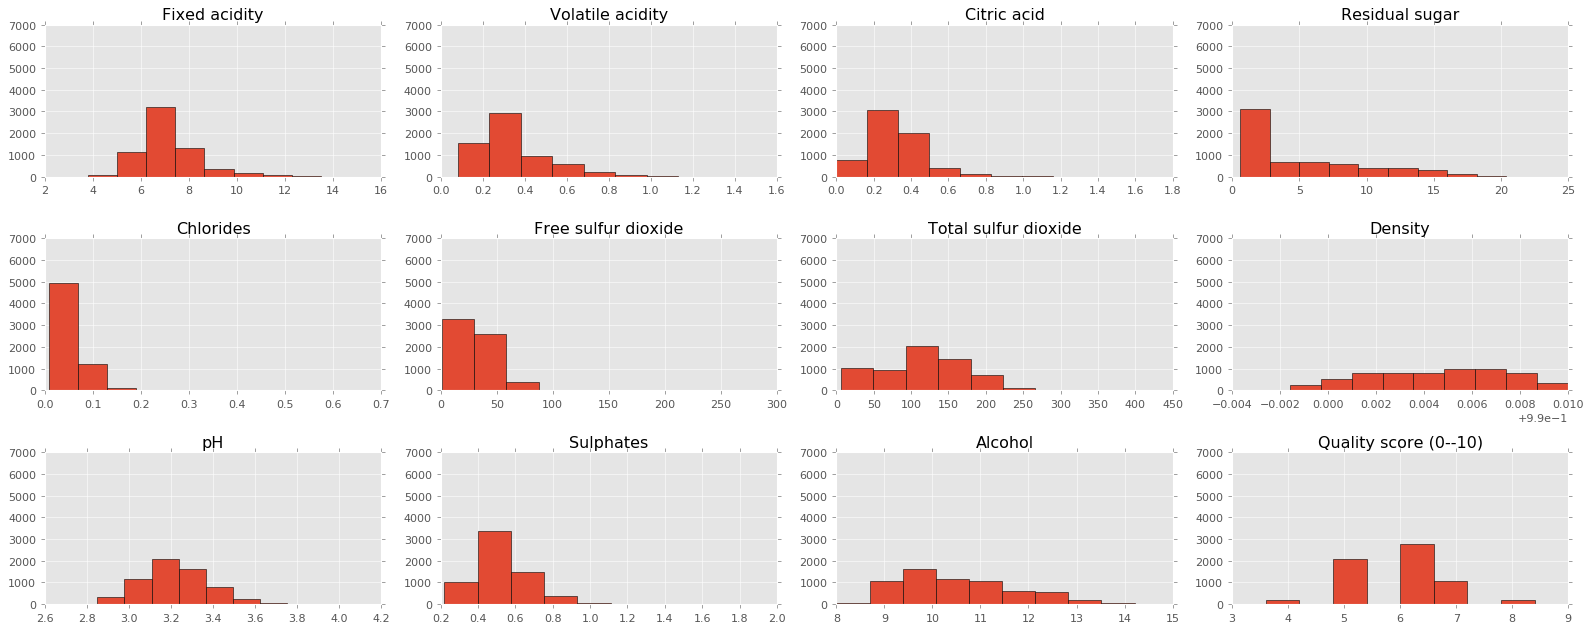

In [25]:
plt.figure(figsize=(20,8))
for colName in colNames:
    plt.subplot(3,4,colNames.index(colName)+1)
    plt.hist(newdf[colName],edgecolor='black')
    plt.title(colName)
    plt.ylim(0, 7000)#  Make the y-axes equal for improved readability
    plt.tight_layout()

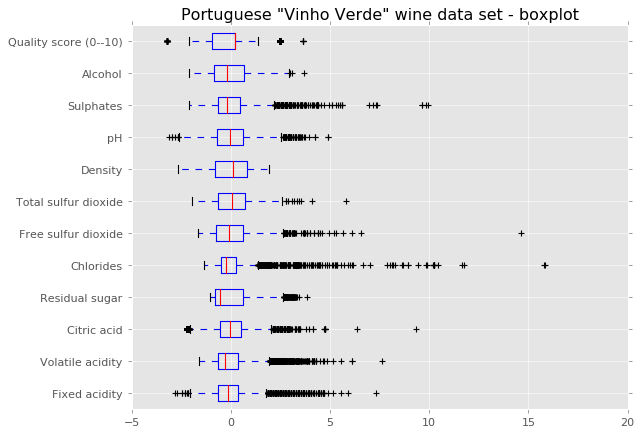

In [26]:
box=[]
for colName in colNames:
    box.append(zscore(newdf[colName],ddof=1).tolist())

plt.boxplot(box,vert=0,labels=colNames)
plt.title('Portuguese "Vinho Verde" wine data set - boxplot'); 

This reveals no further outliers, and we conclude that all outliers have been detected and removed.

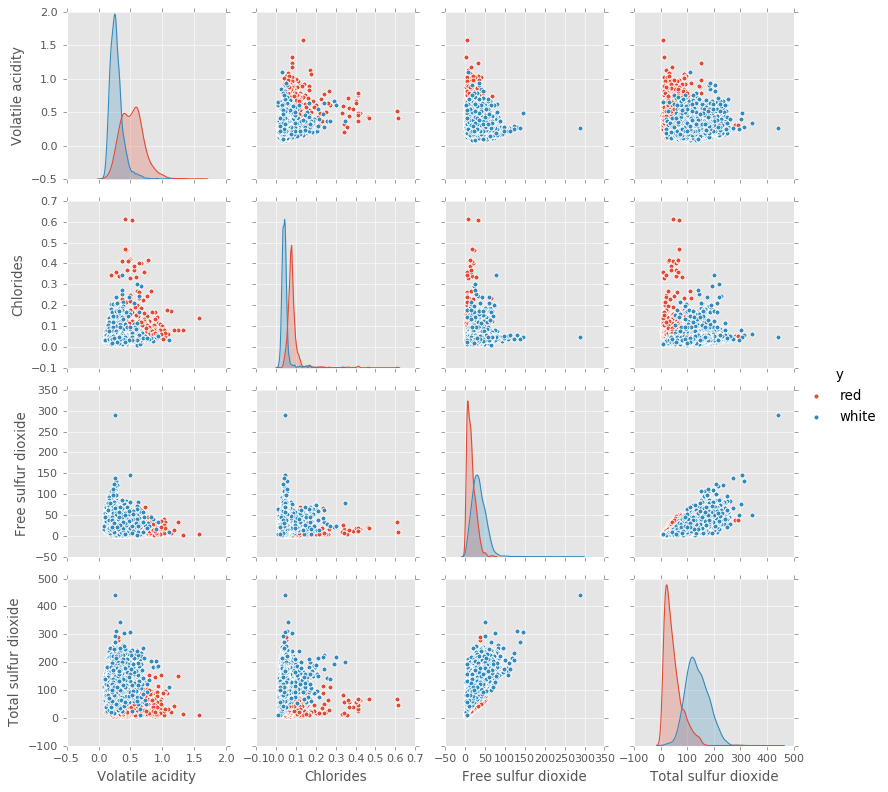

In [30]:
data=newdf.iloc[:,[1,4,5,6,12]]
data.loc[:,"y"]= data.loc[:,"y"].apply(lambda x: "white" if x==1 else "red" )
sns.pairplot(data, kind="scatter",diag_kind="kde",hue="y");


### Understanding Univariate and Multivariate Normal Distribution

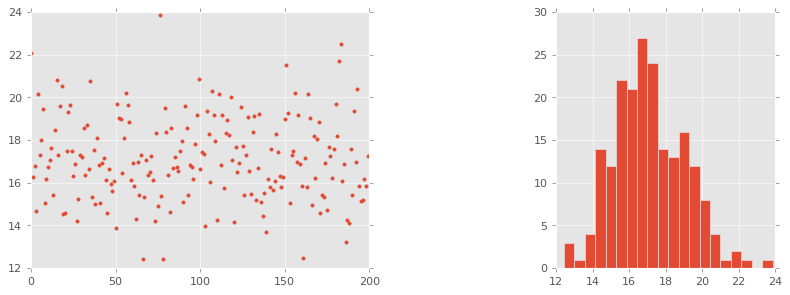

In [31]:
# np.random.seed(1)

# Number of samples
N = 200

# Mean
mu = 17

# Standard deviation
s = 2

# Number of bins in histogram
nbins = 20

X=np.random.normal(mu,s,N)

# Plot the samples and histogram
plt.figure(figsize=(12,4))
plt.title('Normal distribution')
plt.subplot(1,2,1)
plt.plot(X,'.')
plt.subplot(1,3,3)
plt.hist(X, bins=nbins);


In [32]:
# Compute empirical mean and standard deviation
mu_ = X.mean()
s_ = X.std(ddof=1)

print ("Theoretical mean: ", mu)
print ("Theoretical std.dev.: ", s)
print ("Empirical mean: ", mu_)
print ("Empirical std.dev.: ", s_)

Theoretical mean:  17
Theoretical std.dev.:  2
Empirical mean:  17.119028587240976
Empirical std.dev.:  1.9751372995315772


'sd= 2.0'

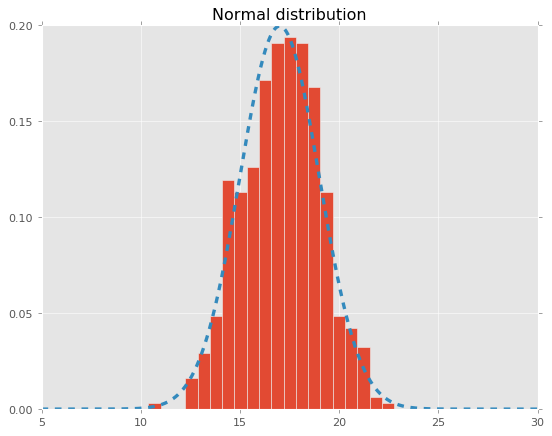

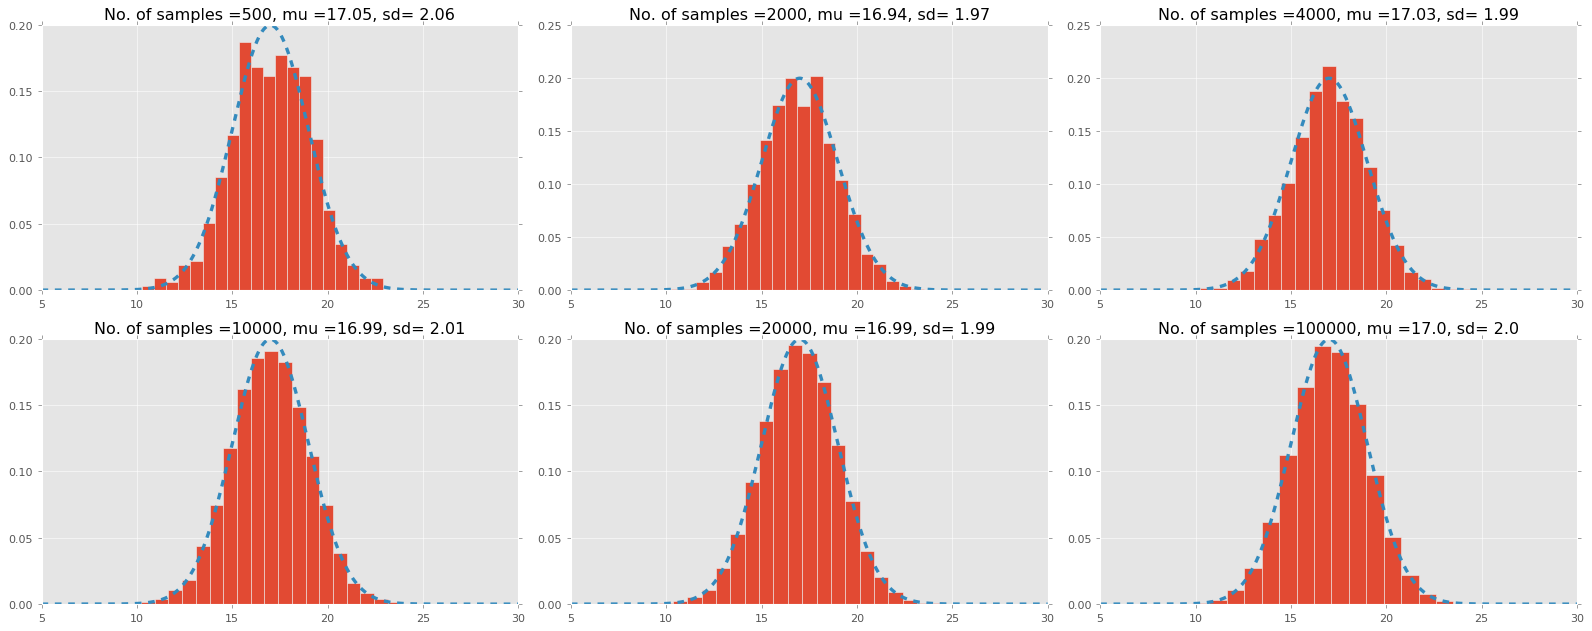

In [33]:
from scipy.stats import norm

# Number of samples
N = 500

# Mean
mu = 17

# Standard deviation
s = 2

# Number of bins in histogram
nbins = 20

# Generate samples from the Normal distribution
X=np.random.normal(mu,s,N)

# Plot the histogram
plt.hist(X, bins=nbins,density=True)
plt.title('Normal distribution');

x=np.linspace(5,30,2000)
y=norm.pdf(x,mu,s)
plt.plot(x,y,"--",linewidth=3);

NO=[500,2000,4000,10000,20000,100000]
plt.figure(figsize=(20,8))
for n in NO:
    X=np.random.normal(mu,s,n)
    plt.subplot(2,len(NO)/2,NO.index(n)+1)
    plt.hist(X, bins=nbins,density=True)
    plt.plot(x,y,"--",linewidth=3)
    plt.title("No. of samples ="+str(n)+", mu ="+str(np.round(X.mean(),2))+", sd= "+str(np.round(X.std(),2)))
    plt.tight_layout()
    
"mu ="+str(np.round(X.mean(),2)) 
"sd= "+str(np.round(X.std(),2))

In [34]:
# Number of samples
N = 1000

# Mean
mu = np.array([13, 17])

# Covariance matrix
#1
cov=np.array([4,3,3,9]).reshape(2,2)
#2
cov = np.matrix('4 3; 3 9')

# Generate samples from the Normal distribution
X=np.random.multivariate_normal(mu,cov,N)
print(X)

[[10.61164853 15.7294335 ]
 [15.20144921 21.83875331]
 [15.30463097 20.54665309]
 ...
 [12.20704589 19.94297873]
 [ 9.10362001 17.1574748 ]
 [10.61107848 15.62389905]]


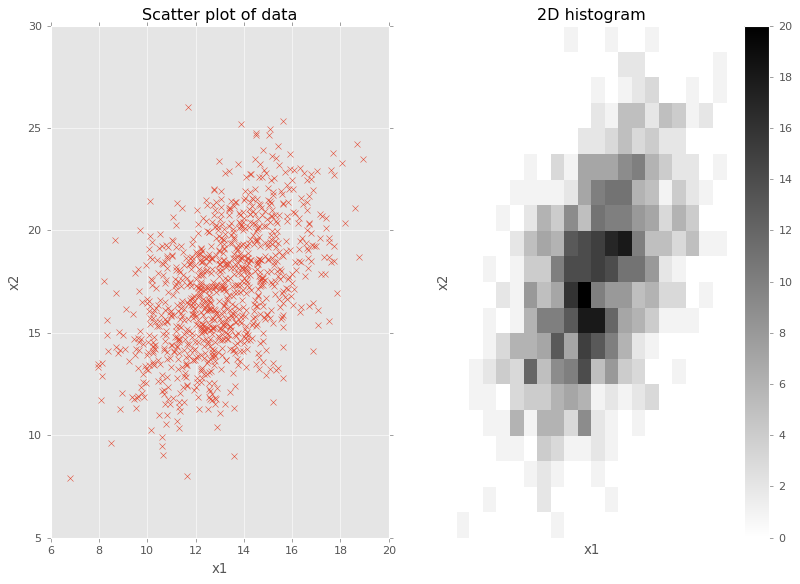

In [35]:
# Number of samples
N = 1000

# Standard deviation of x1
s1 = 2

# Standard deviation of x2
s2 = 3

# Correlation between x1 and x2
corr = 0.5

# Covariance matrix
S = np.matrix([[s1*s1, corr*s1*s2], [corr*s1*s2, s2*s2]])
S =np.array([s1*s1, corr*s1*s2, corr*s1*s2, s2*s2]).reshape(2,2)

# Mean
mu = np.array([13, 17])

# Number of bins in histogram
nbins = 20

# Generate samples from multivariate normal distribution
X = np.random.multivariate_normal(mu, S, N)


# Plot scatter plot of data
plt.figure(figsize=(12,8))
plt.title('2-D Normal distribution')

plt.subplot(1,2,1)
plt.plot(X[:,0], X[:,1], 'x')
plt.xlabel('x1'); plt.ylabel('x2')
plt.title('Scatter plot of data')

plt.subplot(1,2,2)
x = plt.hist2d(X[:,0], X[:,1], nbins,cmap="gray_r")
##plt.imshow(x[0], cmap="gray_r", interpolation='None', origin='lower')
plt.colorbar()
plt.xlabel('x1'); plt.ylabel('x2'); plt.xticks([]); plt.yticks([]);
plt.title('2D histogram');



Text(0, 0.5, 'x2')

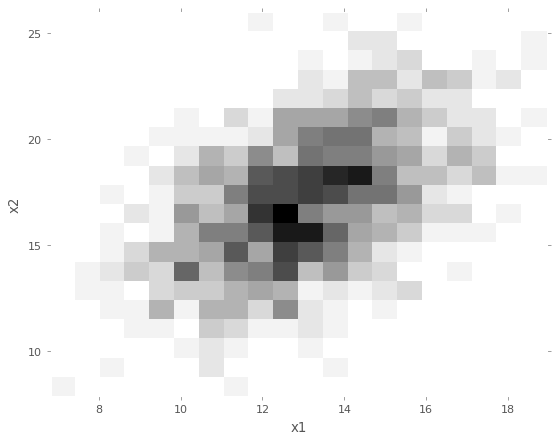

In [36]:
plt.hist2d(X[:,0], X[:,1], nbins,cmap="gray_r")
plt.xlabel('x1')
plt.ylabel('x2')

### Statistics on Digits

In [37]:
traindata=scipy.io.loadmat("zipdata.mat")["traindata"]
print(traindata.shape)
print(traindata[0][0])
print(traindata[0][1:])
y=[traindata[x][0] for x in range(7291)]
X= [traindata[x][1:] for x in range(7291)]

(7291, 257)
6.0
[-1.    -1.    -1.    -1.    -1.    -1.    -1.    -0.631  0.862 -0.167
 -1.    -1.    -1.    -1.    -1.    -1.    -1.    -1.    -1.    -1.
 -1.    -1.    -0.992  0.297  1.     0.307 -1.    -1.    -1.    -1.
 -1.    -1.    -1.    -1.    -1.    -1.    -1.    -1.    -0.41   1.
  0.986 -0.565 -1.    -1.    -1.    -1.    -1.    -1.    -1.    -1.
 -1.    -1.    -1.    -0.683  0.825  1.     0.562 -1.    -1.    -1.
 -1.    -1.    -1.    -1.    -1.    -1.    -1.    -1.    -0.938  0.54
  1.     0.778 -0.715 -1.    -1.    -1.    -1.    -1.    -1.    -1.
 -1.    -1.    -1.    -1.     0.1    1.     0.922 -0.439 -1.    -1.
 -1.    -1.    -1.    -1.    -1.    -1.    -1.    -1.    -1.    -0.257
  0.95   1.    -0.162 -1.    -1.    -1.    -0.987 -0.714 -0.832 -1.
 -1.    -1.    -1.    -1.    -0.797  0.909  1.     0.3   -0.961 -1.
 -1.    -0.55   0.485  0.996  0.867  0.092 -1.    -1.    -1.    -1.
  0.278  1.     0.877 -0.824 -1.    -0.905  0.145  0.977  1.     1.
  1.     0.99  -0.745 -1

In [38]:
X[0].reshape(16,16)

array([[-1.   , -1.   , -1.   , -1.   , -1.   , -1.   , -1.   , -0.631,
         0.862, -0.167, -1.   , -1.   , -1.   , -1.   , -1.   , -1.   ],
       [-1.   , -1.   , -1.   , -1.   , -1.   , -1.   , -0.992,  0.297,
         1.   ,  0.307, -1.   , -1.   , -1.   , -1.   , -1.   , -1.   ],
       [-1.   , -1.   , -1.   , -1.   , -1.   , -1.   , -0.41 ,  1.   ,
         0.986, -0.565, -1.   , -1.   , -1.   , -1.   , -1.   , -1.   ],
       [-1.   , -1.   , -1.   , -1.   , -1.   , -0.683,  0.825,  1.   ,
         0.562, -1.   , -1.   , -1.   , -1.   , -1.   , -1.   , -1.   ],
       [-1.   , -1.   , -1.   , -1.   , -0.938,  0.54 ,  1.   ,  0.778,
        -0.715, -1.   , -1.   , -1.   , -1.   , -1.   , -1.   , -1.   ],
       [-1.   , -1.   , -1.   , -1.   ,  0.1  ,  1.   ,  0.922, -0.439,
        -1.   , -1.   , -1.   , -1.   , -1.   , -1.   , -1.   , -1.   ],
       [-1.   , -1.   , -1.   , -0.257,  0.95 ,  1.   , -0.162, -1.   ,
        -1.   , -1.   , -0.987, -0.714, -0.832, -1.   , -1

matrix([[0.]])

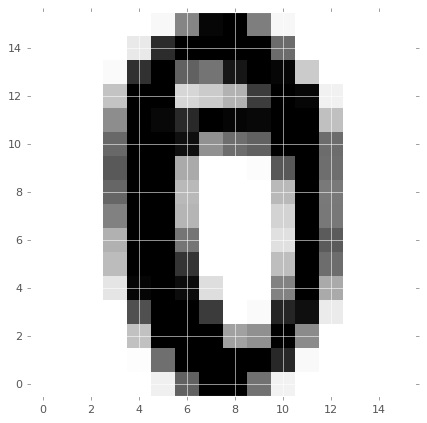

In [41]:
plt.imshow(X[1].reshape(16,16), cmap="gray_r", interpolation='nearest', origin='lower')
y[1]

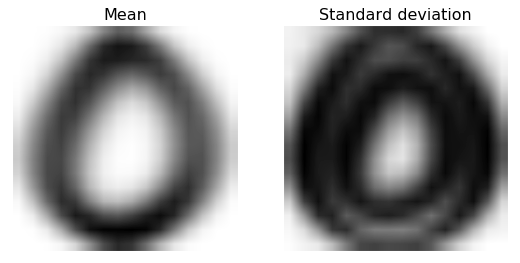

In [40]:
from pylab import *
import scipy.linalg as linalg
from scipy.io import loadmat

# Digits to include in analysis (to include all: n = range(10))
n = [0]

# Load Matlab data file to python dict structure
# and extract variables of interest
traindata = loadmat('zipdata.mat')['traindata']
X = mat(traindata[:,1:])
y = mat(traindata[:,0]).T
N, M = shape(X)
C = len(n)

# Remove digits that are not to be inspected
class_mask = np.zeros(N).astype(bool)
for v in n:
    cmsk = y.A.ravel()==v
    class_mask = class_mask | cmsk
X = X[class_mask,:]
y = y[class_mask,:]
N = shape(X)[0]

mu = X.mean(axis=0)
s = X.std(ddof=1, axis=0)
S = np.cov(X, rowvar=0, ddof=1)

figure()
subplot(1,2,1)
I = reshape(mu, (16,16))
imshow(I, cmap=cm.gray_r)
title('Mean')
xticks([]); yticks([])
subplot(1,2,2)
I = reshape(s, (16,16))
imshow(I, cmap=cm.gray_r)
title('Standard deviation')
xticks([]); yticks([])

show()